# WeatherPy Homework 
**(October 22, 2019)  
by Gerard Tieng**  

---

**OBJECTIVES**

• Use Citipy to select 500 cities at random based on coordinates  
• Use Openweathermap API to source weather values for each city  
• Use Pandas to create and manage a readable dataframe of the data  
• Use Matplotlib to create scatterplots of the following information:  

1. Temperature (F) vs. Latitude
2. Humidity (%) vs. Latitude
3. Cloudiness (%) vs. Latitude
4. Wind Speed (mph) vs. Latitude

# Pre-work

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import csv


#import API key
from api_keys import api_key


# **NOTE: Range of latitudes and longitudes below**
# http://www.geomidpoint.com/latlon.html
lat_range = (-90, 90)
lng_range = (-180, 180)

# Random Cities Selection

**Method**
1. generate random latitudes & longitudes
2. zip latitude & longitude to create citipy coordinate
3. execute citipy.nearest_city loop to create list of 500 cities

In [2]:
#1 - use np.random.uniform() to select float numbers from latitude & longitude range

rand_lat = np.random.uniform(low= -90.000, high= 90.000, size= 1500)
rand_long = np.random.uniform(low= -180.000, high= 180.000, size= 1500)

In [3]:
#2 - zip coordinates into a list holder

rand_coordinates = []
rand_coordinates = zip(rand_lat, rand_long)

In [4]:
#3 - execute citipy loop to list 500 cities in city holder list

cities = []

for coordinates in rand_coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

# API Calling: OpenWeatherMap API

In [5]:
#based on openweathermap documentation, configure "baseurl"...  
# ...to include api call, api key, & imperial units

base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="


#execute API loop to gather weather information in list holders for scatterplot

output=[]
city_confirmed = []
temps = []
humid = []
wspeed = []
clouds = []
owm_lat = []
city_ind = 1


for i in cities:
   
    weather_pull = requests.get(base_url + i)
    
    if weather_pull.ok == True:
        weather_data = weather_pull.json()
        output.append(weather_data)
        city_confirmed.append(weather_data["name"])
        owm_lat.append(weather_data["coord"]["lat"])
        temps.append(weather_data["main"]["temp"])
        humid.append(weather_data["main"]["humidity"])
        wspeed.append(weather_data["wind"]["speed"])
        clouds.append(weather_data["clouds"]["all"])
        
        print(f"Retrieving City No. {city_ind}: {i}")
        city_ind += 1
    
    #conditional for unknown city request  
    elif weather_pull.ok == False:
        print("*************************")
        print(f"City name {i} not found.")
        print("*************************")


print("--------------------")      
print(f"API retrieval complete with weather data for {city_ind} cities.")

*************************
City name belushya guba not found.
*************************
*************************
City name barentsburg not found.
*************************
Retrieving City No. 1: qaanaaq
Retrieving City No. 2: hobart
Retrieving City No. 3: bambous virieux
Retrieving City No. 4: umba
Retrieving City No. 5: port alfred
Retrieving City No. 6: inuvik
Retrieving City No. 7: kharan
Retrieving City No. 8: saldanha
Retrieving City No. 9: pisco
Retrieving City No. 10: mataura
Retrieving City No. 11: carnarvon
Retrieving City No. 12: kautokeino
Retrieving City No. 13: mar del plata
Retrieving City No. 14: yellowknife
Retrieving City No. 15: cherskiy
Retrieving City No. 16: adrar
Retrieving City No. 17: vaini
Retrieving City No. 18: luderitz
Retrieving City No. 19: kabanjahe
Retrieving City No. 20: ugoofaaru
Retrieving City No. 21: butaritari
Retrieving City No. 22: puerto ayora
Retrieving City No. 23: almeirim
Retrieving City No. 24: paamiut
Retrieving City No. 25: kandrian
Retri

Retrieving City No. 201: agogo
Retrieving City No. 202: marzuq
Retrieving City No. 203: alofi
Retrieving City No. 204: baillif
Retrieving City No. 205: japura
Retrieving City No. 206: noyabrsk
Retrieving City No. 207: flinders
Retrieving City No. 208: kodiak
Retrieving City No. 209: oktyabrskoye
Retrieving City No. 210: berlevag
Retrieving City No. 211: kirkenaer
Retrieving City No. 212: torbay
Retrieving City No. 213: sao filipe
*************************
City name kembe not found.
*************************
Retrieving City No. 214: tazmalt
Retrieving City No. 215: saint george
Retrieving City No. 216: esperance
*************************
City name nguiu not found.
*************************
Retrieving City No. 217: owando
Retrieving City No. 218: merauke
*************************
City name jamnah not found.
*************************
Retrieving City No. 219: wuchi
Retrieving City No. 220: pauini
Retrieving City No. 221: papa
Retrieving City No. 222: amapa
*************************
City na

*************************
City name vaovai not found.
*************************
Retrieving City No. 385: ostrovnoy
Retrieving City No. 386: sochi
Retrieving City No. 387: yamethin
Retrieving City No. 388: that phanom
Retrieving City No. 389: lazaro cardenas
Retrieving City No. 390: shimoda
Retrieving City No. 391: grindavik
*************************
City name asfi not found.
*************************
Retrieving City No. 392: ruteng
Retrieving City No. 393: kisangani
Retrieving City No. 394: shebunino
Retrieving City No. 395: severo-kurilsk
Retrieving City No. 396: doha
Retrieving City No. 397: griffith
*************************
City name marcona not found.
*************************
Retrieving City No. 398: dalhousie
Retrieving City No. 399: belaya gora
Retrieving City No. 400: anadyr
Retrieving City No. 401: voskresenskoye
Retrieving City No. 402: belaya
Retrieving City No. 403: krasnyy chikoy
Retrieving City No. 404: ingham
Retrieving City No. 405: darhan
*************************
Cit

In [18]:
#output csv

file = "owm_json_output.csv"

with open(file, 'w') as csv_file:
    fieldnames = list(weather_data.keys())
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for data in output:
        try:
            writer.writerow(data)
        except:
            pass

# Dataframe Assembly

In [19]:
# assemble dataframe from weather info list holders
weather_df = {"Cities": city_confirmed,
              "Latitude": owm_lat, 
              "Temperature(F)": temps, 
              "Humidity": humid, 
              "Windspeed": wspeed, 
              "Clouds": clouds
             }

pd.DataFrame(weather_df).head(20)

,Cities,Latitude,Temperature(F),Humidity,Windspeed,Clouds
0,Qaanaaq,77.48,7.81,38,10.09,43
1,Hobart,-42.88,51.48,87,5.82,96
2,Bambous Virieux,-20.34,76.48,78,9.17,40
3,Umba,66.69,38.10,93,18.72,100
4,Port Alfred,-33.59,61.00,65,8.99,81
5,Inuvik,68.36,17.60,100,4.70,90
6,Kharan,28.58,79.75,17,5.64,0
7,Saldanha,41.42,58.08,44,11.59,30
8,Pisco,-13.71,67.37,30,5.82,90
9,Mataura,-46.19,42.01,79,8.01,58


# Matplotlib - Scatterplots

### Temperature (F) vs. Latitude

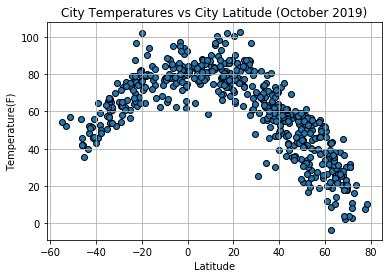

In [20]:
#plot temp vs lat
tempVSlat = plt.scatter(weather_df["Latitude"], weather_df["Temperature(F)"], edgecolors="k")

#labels and legend
plt.title("City Temperatures vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(True)

#save and show
plt.savefig("tempVSlat_GT.png")
plt.show()

### Humidity (%) vs. Latitude

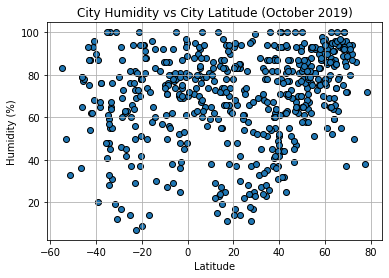

In [21]:
#plot humid vs lat
humidVSlat = plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="k")

#labels and legend
plt.title("City Humidity vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save and show
plt.savefig("humidVSlat_GT.png")
plt.show()

### Windspeed (mph) vs. Latitude



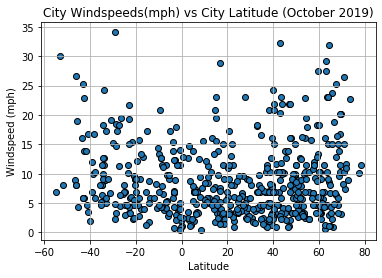

In [22]:
#plot clouds vs lat
windsVSlat = plt.scatter(weather_df["Latitude"], weather_df["Windspeed"], edgecolors="k")

#labels and legend
plt.title("City Windspeeds(mph) vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

#save and show
plt.savefig("windsVSlat_GT.png")
plt.show()

### Cloudiness (%) vs. Latitude

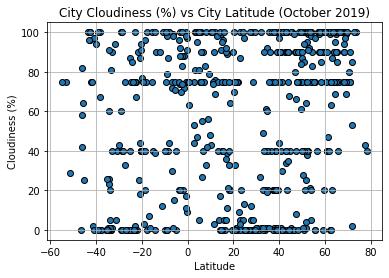

In [23]:
#plot wind vs lat
cloudsVSlat = plt.scatter(weather_df["Latitude"], weather_df["Clouds"], edgecolor="k")

#labels and legend
plt.title("City Cloudiness (%) vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save and show
plt.savefig("cloudsVSlat_GT.png")
plt.show()

# CONCLUSION

• With no city data below the -60 latitude mark, it seems that there are little to no cities near the polar latitudes or OpenWeatherMap's data does not cover those areas.

• Based on the data, there is an observable curve that shows that cities located closer to the equator line are typically hotter than those that are further.

• A majority of global cities experience windspeeds between 0-10 mph. Meanwhile, windspeeds above 30mph are less likely but will typically occur at the latitude limits.

• With high concentrations on each horizontal line, it seems that cloudiness measurements are likely to be reported in 20% increments.

• Most cities experience humidity above 60%. Meanwhile, city locations under 40% humidity are likely to be found within the 20-40 latitude degrees on either side of the equator line.